In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimization
from scipy.optimize import least_squares
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [2]:
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant1/zero_csvdf_ant1_zero_7.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant2/zero_csvdf_ant2_zero_7.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant3/zero_csvdf_ant3_zero_7.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant1_45_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant2_45_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant3_45_2.csv'
path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant1_30_2.csv'
path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant2_30_2.csv'
path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant3_30_2.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant1_0_posi0_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant2_0_posi0_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant3_0_posi0_2.csv'

df1 = pd.read_csv(path1) # in each channel we have 96 data points per antenna
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
len(df1)

6624

In [3]:
t = df1[df1.Channel >= 11]
t['omega'] = (t['Channel']-11)*2+ 2428.25
tless = df1[df1.Channel < 11]
tless['omega'] = (tless['Channel'])*2 + 2404.25
df1 = t.append(tless)

<ipython-input-3-3d26178556e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['omega'] = (t['Channel']-11)*2+ 2428.25
<ipython-input-3-3d26178556e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tless['omega'] = (tless['Channel'])*2 + 2404.25


In [4]:
X12 = (df1['I'] + 1j*df1['Q']) * (df2['I'] - 1j*df2['Q'])
X23 = (df2['I'] + 1j*df2['Q']) * (df3['I'] - 1j*df3['Q'])
X13 = (df1['I'] + 1j*df1['Q']) * (df3['I'] - 1j*df3['Q'])

In [5]:
d = {'channel': df1['Channel'],'omega':df1['omega'],'x12': X12}
data = pd.DataFrame(data=d)
data['phi12'] = np.angle(X12)
data['phi23'] = np.angle(X23)
data['phi13'] = np.angle(X13)
data['mag12'] = np.abs(X12)
data['mag23'] = np.abs(X23)
data['mag13'] = np.abs(X13)

In [6]:
data['phi13'].max()*180/np.pi, data['phi13'].min()*180/np.pi

(180.0, -179.99825355017236)

In [7]:
len(data)

6624

# Optimize the points
Using non-linear least squre fitting. to fit the pounts to the expected curve. 

In [6]:
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_45deg.csv'
path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_30deg.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti_for23.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti_45deg.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti_30deg.csv'

df_corr = pd.read_csv(path_coeff)
df_corr.ex_phi12.mean()*180/np.pi

102.38143060950887

In [107]:
ts = np.arange(0.25,24.25, 0.25)
N = int(len(df1)/96)
for n in range(N):
    for i in range(len(ts)):
        df1['ts'][i+n*96] = ts[i]
df1[(N-1)*96:96*(N)] 

<ipython-input-107-c661f1c39341>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ts'][i+n*96] = ts[i]


,Unnamed: 0,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,sample_idx,time_per_channel,omega,ts
6336,19540,66,10,(-168+578j),-168,578,601.920260,10307.00,44,11.00,2424.25,0.25
6337,19541,66,10,(99+628j),99,628,635.755456,10307.25,45,11.25,2424.25,0.50
6338,19542,66,10,(329+538j),329,538,630.622708,10307.50,46,11.50,2424.25,0.75
6339,19543,66,10,(527+326j),527,326,619.681370,10307.75,47,11.75,2424.25,1.00
6340,19552,66,10,(310-502j),310,-502,590.003390,10313.00,68,17.00,2424.25,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...
6427,19807,66,10,(282+573j),282,573,638.633698,10439.75,575,143.75,2424.25,23.00
6428,19816,66,10,(536-208j),536,-208,574.943475,10445.00,596,149.00,2424.25,23.25
6429,19817,66,10,(429-458j),429,-458,627.538843,10445.25,597,149.25,2424.25,23.50
6430,19818,66,10,(227-595j),227,-595,636.831218,10445.50,598,149.50,2424.25,23.75


array([<AxesSubplot:>], dtype=object)

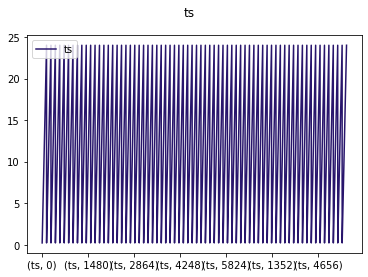

In [126]:
df1.unstack(level=0)[['ts']].plot(subplots=True, title="ts", color= '#28156c', label='ts', legend=True)

In [167]:
# optomize the data from ANT1
def s(theta, t ):
    x = theta[0] * np.cos(2*np.pi*t*fc + phi)
    y = theta[1] * np.sin(2*np.pi*t*fc + phi)
    return np.array([x, y])

ts = df1.ts

phi = 0;
Ai = df1.Magnitude.mean()
Aq = df1.Magnitude.mean()
fc = df1.omega.mean(); 
ss = s([Ai, Aq, fc, phi], ts)
ss[0] += df1['I']
ss[1] += df1['Q']

def fun(theta):
    return (ss- s(theta, ts)).flatten()

theta0 = [0,0,0,0]
res1 = least_squares(fun, theta0)
N = int(len(res1.fun)/2)
new_i1 = res1.fun[0:N]
new_q1 = res1.fun[N:len(res1.fun)]

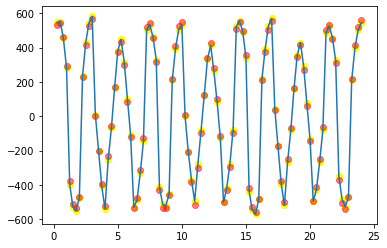

In [147]:
plt.plot(ts[96*2:96*3], new_i1[96*2:96*3])
plt.scatter(ts[96*2:96*3], new_i1[96*2:96*3], c = 'yellow')
plt.scatter(ts[96*2:96*3], df1['I'][96*2:96*3], c = 'red', alpha = 0.5)

In [129]:
# print(df1.time_per_channel-10.75, df2.time_per_channel-9, df3.time_per_channel-13,
#       'n', df3.time_per_channel.max(), df1.time_per_channel.max(),df2.time_per_channel.max())

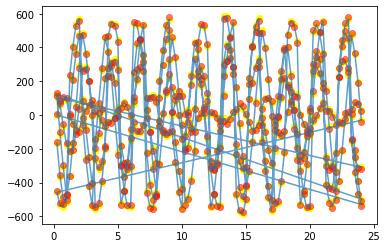

In [148]:
plt.plot(ts[0:96*5], new_q1[0:96*5], alpha = 0.7)
plt.scatter(ts[0:96*5], new_q1[0:96*5], c = 'yellow')
plt.scatter(ts[0:96*5], df1['Q'][0:96*5], c = 'red', alpha = 0.5)

In [149]:
# plt.plot(ts[0:96], new_i1[0:96], alpha = 0.6)
# plt.plot(ts[0:96], np.cos(np.deg2rad(ts[0:96])) + noise, c='red', alpha = 0.5)

In [150]:
# plt.plot(ts[0:96], new_q1[0:96], alpha = 0.6, )
# plt.plot(ts[0:96],np.sin(np.deg2rad(ts[0:96])) + noise, c='red', alpha = 0.5)

In [151]:
# optomize the data from ANT2

Ai = df2.Magnitude.mean()
Aq = Ai
ss = s([Ai, Aq, fc, phi], ts)
ss[0] += df2['I']
ss[1] += df2['Q']

res2 = least_squares(fun, theta0)
N = int(len(res2.fun)/2)
new_i2 = res2.fun[0:N]
new_q2 = res2.fun[N:len(res2.fun)]

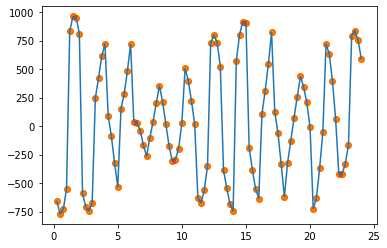

In [152]:
plt.plot(ts[96*2:96*3], new_i2[96*2:96*3])
plt.scatter(ts[96*2:96*3], new_i2[96*2:96*3], c = 'yellow')
plt.scatter(ts[96*2:96*3], df2['I'][96*2:96*3], c = 'red', alpha = 0.5)

In [153]:
# optomize the data from ANT3
Ai = df3.Magnitude.mean()
Aq = Ai
ss = s([Ai, Aq, fc, phi], ts)
ss[0] += df3['I']
ss[1] += df3['Q']

res3 = least_squares(fun, theta0)
N = int(len(res3.fun)/2)
new_i3 = res3.fun[0:N]
new_q3 = res3.fun[N:len(res3.fun)]

In [154]:
X12_opt = (new_i1 + 1j*new_q1) * (new_i2 - 1j*new_q2)
X23_opt = (new_i2 + 1j*new_q2) * (new_i3 - 1j*new_q3)
X13_opt = (new_i1 + 1j*new_q1) * (new_i3 - 1j*new_q3)

In [155]:
data['phi12_opt'] = np.angle(X12_opt)
data['phi23_opt'] = np.angle(X23_opt)
data['phi13_opt'] = np.angle(X13_opt)
# data['mag12_opt'] = np.abs(X12_opt)
# data['mag23_opt'] = np.abs(X23_opt)
# data['mag13_opt'] = np.abs(X13_opt)

In [156]:
print(data['phi12_opt'][0:96].mean()* 180/np.pi, data['phi12_opt'][96:96*2].mean()* 180/np.pi)

111.42787733816203 66.9239448654656


In [157]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], "omega":data['omega'][i],
                       "ave_phi12": np.average(data['phi12'][i:i+96]),
                       "ave_phi23": np.average(data['phi23'][i:i+96]),
                        "ave_phi13": np.average(data['phi13'][i:i+96]),
                        "ave_phi12_opt": np.average(data['phi12_opt'][i:i+96]),
                       "ave_phi23_opt": np.average(data['phi23_opt'][i:i+96]),
                        "ave_phi13_opt": np.average(data['phi13_opt'][i:i+96]),
                       "ave_mag12": np.average(data['mag12'][i:i+96]),
                       "ave_mag23": np.average(data['mag23'][i:i+96]),
                       "ave_mag13": np.average(data['mag13'][i:i+96]),})
average_perchannel = pd.DataFrame(phi_channel)

In [158]:
print(' angle per paire', np.average(average_perchannel['ave_phi12'])*180/np.pi, np.average(average_perchannel['ave_phi23'])*180/np.pi, np.average(average_perchannel['ave_phi13'])*180/np.pi,
     '\n average mag per paire', np.average(average_perchannel['ave_mag12']), np.average(average_perchannel['ave_mag23']), np.average(average_perchannel['ave_mag13']),
     '\n total average of angle', (np.average(average_perchannel['ave_phi12'])/3+ np.average(average_perchannel['ave_phi23'])/3+ np.average(average_perchannel['ave_phi13'])/3)*180/np.pi,
     '\n STD per paire', average_perchannel['ave_phi12'].std(), average_perchannel['ave_phi23'].std(), average_perchannel['ave_phi13'].std())

 angle per paire 67.46458960864527 51.97817584176732 -45.55723454958743 
 average mag per paire 245520.68390673015 223400.12613959084 253469.85007197087 
 total average of angle 24.628510300275053 
 STD per paire 1.460949745653377 1.3180852158008347 1.970705755269802


In [159]:
print(' Angle_per paire', np.average(average_perchannel['ave_phi12_opt'])*180/np.pi, np.average(average_perchannel['ave_phi23_opt'])*180/np.pi, np.average(average_perchannel['ave_phi13_opt'])*180/np.pi,
     '\n Average', (np.average(average_perchannel['ave_phi12_opt'])/3+ np.average(average_perchannel['ave_phi23_opt'])/3+ np.average(average_perchannel['ave_phi13_opt'])/3)*180/np.pi,
     '\n STD', average_perchannel['ave_phi12_opt'].std(), average_perchannel['ave_phi23_opt'].std(), average_perchannel['ave_phi13_opt'].std())

 Angle_per paire -4.172986841162609 52.337548218125704 -15.639786449123866 
 Average 10.841591642613075 
 STD 1.2919455252948744 1.2897754964321042 1.2221034328537137


In [122]:
# average_perchannel.unstack(level=0)[['ave_mag12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_mag12', legend=True)
# average_perchannel.unstack(level=0)[['ave_mag23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_mag23', legend=True)
# average_perchannel.unstack(level=0)[['ave_mag13']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='ave_mag13', legend=True)

In [123]:
# average_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_phi23', legend=True)
# average_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='ave_phi13', legend=True)

In [124]:
len(np.unique(average_perchannel.channel)), len(np.unique(df_corr.channel))


(35, 35)

In [125]:
np.average(df_corr.phi12_correction)*180/np.pi, np.average(df_corr.phi23_correction)*180/np.pi, np.average(df_corr.phi13_correction)*180/np.pi

(-14.98900757654512, -48.548860371002746, -313.5378679475478)

In [23]:
channl = average_perchannel.channel
phi12_corr_ave = []
phi23_corr_ave = []
phi13_corr_ave = []
phi12_corr_ave_opt = []
phi23_corr_ave_opt = []
phi13_corr_ave_opt = []
# phi12_ave = []
for ch in channl:
    g = df_corr[df_corr.channel == ch]
    f = average_perchannel[average_perchannel.channel ==ch]
    phi12_corr_ave.append(np.average(f.ave_phi12)- np.average(g.phi12_correction))
    phi23_corr_ave.append(np.average(f.ave_phi23)- np.average(g.phi23_correction))
    phi13_corr_ave.append(np.average(f.ave_phi13)- np.average(g.phi13_correction))
    phi12_corr_ave_opt.append(np.average(f.ave_phi12_opt)- np.average(g.phi12_correction))
    phi23_corr_ave_opt.append(np.average(f.ave_phi23_opt)- np.average(g.phi23_correction))
    phi13_corr_ave_opt.append(np.average(f.ave_phi13_opt)- np.average(g.phi13_correction))
#     phi12_ave.append(np.average(g.phi12_correction)*180/np.pi)
#     print(np.average(g.phi12_correction)*180/np.pi)


# print(len(average_perchannel), np.average(phi12_ave))
average_perchannel['corrected_phi12'] = phi12_corr_ave
average_perchannel['corrected_phi23'] = phi23_corr_ave
average_perchannel['corrected_phi13'] = phi13_corr_ave
average_perchannel['corrected_phi12_opt'] = phi12_corr_ave_opt
average_perchannel['corrected_phi23_opt'] = phi23_corr_ave_opt
average_perchannel['corrected_phi13_opt'] = phi13_corr_ave_opt
np.average(phi12_corr_ave)*180/np.pi, np.average(phi23_corr_ave)*180/np.pi, np.average(phi13_corr_ave)*180/np.pi,
np.max(phi12_corr_ave)*180/np.pi, np.max(phi23_corr_ave)*180/np.pi, np.max(phi13_corr_ave)*180/np.pi, np.min(phi13_corr_ave)*180/np.pi,

(132.09442280363825, 425.8319898338619, 531.7359525779141, 178.40008568939393)

In [24]:
np.average(average_perchannel['corrected_phi12'])*180/np.pi, np.average(average_perchannel['corrected_phi13'])*180/np.pi, np.average(average_perchannel['corrected_phi23'])*180/np.pi

(79.61884515512273, 270.7046843145192, 101.68366524635309)

In [25]:
np.average(average_perchannel['corrected_phi12_opt'])*180/np.pi, np.average(average_perchannel['corrected_phi13_opt'])*180/np.pi, np.average(average_perchannel['corrected_phi23_opt'])*180/np.pi

(16.166512210309186, 331.0257036481671, -2.423417257794354)

In [26]:
np.average(average_perchannel['ave_phi12'])*180/np.pi, np.average(average_perchannel['ave_phi23'])*180/np.pi, np.average(average_perchannel['ave_phi13'])*180/np.pi

(67.46458960864527, 51.97817584176732, -45.55723454958743)

In [27]:
average_perchannel['corrected_phi12_v2'] = average_perchannel['ave_phi12'] - np.average(df_corr.phi12_correction)
average_perchannel['corrected_phi23_v2'] = average_perchannel['ave_phi23'] - np.average(df_corr.phi23_correction)
average_perchannel['corrected_phi13_v2'] = average_perchannel['ave_phi13'] - np.average(df_corr.phi13_correction)

In [28]:
corr_phi12_ave = average_perchannel.corrected_phi12_v2.mean()*180/np.pi,
corr_phi23_ave = average_perchannel.corrected_phi23_v2.mean()*180/np.pi,
corr_phi13_ave = average_perchannel.corrected_phi13_v2.mean()*180/np.pi,
expected_phi = df_corr.ex_phi12.mean()*180/np.pi
print(corr_phi12_ave, corr_phi23_ave, corr_phi13_ave, 
     '\n', abs(corr_phi12_ave-expected_phi), abs(corr_phi23_ave-expected_phi), abs(corr_phi13_ave-expected_phi*2))

(82.45359718519038,) (100.52703621277007,) (267.98063339796045,) 
 [19.92783342] [1.8543944] [63.21777218]


In [29]:
print('\n average phi', (np.average(average_perchannel['ave_phi12'])*180/np.pi+ np.average(average_perchannel['ave_phi23'])*180/np.pi+ np.average(average_perchannel['ave_phi13'])*90/np.pi)/3,
     '\n corrected phi_per channel', (np.average(average_perchannel['corrected_phi12'])*180/np.pi+ np.average(average_perchannel['corrected_phi13'])*90/np.pi+ np.average(average_perchannel['corrected_phi23'])*180/np.pi)/3,
     '\n corrected phi_total average', (average_perchannel.corrected_phi12_v2.mean()*180/np.pi+ average_perchannel.corrected_phi23_v2.mean()*180/np.pi+ average_perchannel.corrected_phi13_v2.mean()*90/np.pi)/3)


 average phi 32.22138272520629 
 corrected phi_per channel 105.55161751957849 
 corrected phi_total average 105.6569833656469


In [30]:
print(' average phi_opt', (np.average(average_perchannel['ave_phi12_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi23_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi13_opt'])*90/np.pi)/3,
     '\n corrected phi_per_opt channel', (np.average(average_perchannel['corrected_phi12_opt'])*180/np.pi+ np.average(average_perchannel['corrected_phi13_opt'])*90/np.pi+ np.average(average_perchannel['corrected_phi23_opt'])*180/np.pi)/3)

 average phi_opt -13.57825253550608 
 corrected phi_per_opt channel 59.75198225886613


In [31]:
print('\n average phi with no correction error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['ave_phi12'])*180/np.pi+ np.average(average_perchannel['ave_phi23'])*180/np.pi+ np.average(average_perchannel['ave_phi13'])*90/np.pi)/3,
     '\n corrected phi_per channel error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['corrected_phi12'])*180/np.pi+ np.average(average_perchannel['corrected_phi13'])*90/np.pi+ np.average(average_perchannel['corrected_phi23'])*180/np.pi)/3,
     '\n corrected phi_total average error', df_corr.ex_phi12.mean()*180/np.pi - (average_perchannel.corrected_phi12_v2.mean()*180/np.pi+ average_perchannel.corrected_phi23_v2.mean()*180/np.pi+ average_perchannel.corrected_phi13_v2.mean()*90/np.pi)/3)


 average phi with no correction error 70.16004788430257 
 corrected phi_per channel error -3.170186910069617 
 corrected phi_total average error -3.275552756138026


In [32]:
print('\n average phi_opt with no correction error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['ave_phi12_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi23_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi13_opt'])*90/np.pi)/3,
     '\n corrected phi_per_opt channel error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['corrected_phi12_opt'])*180/np.pi+ np.average(average_perchannel['corrected_phi13_opt'])*90/np.pi+ np.average(average_perchannel['corrected_phi23_opt'])*180/np.pi)/3,)


 average phi_opt with no correction error 115.95968314501495 
 corrected phi_per_opt channel error 42.62944835064274


In [33]:
df_corr.ex_phi12.mean()*180/np.pi

102.38143060950887

calculate the standard deviation of corrected signal, per antenna! (averaging the valus (phi12/3, phi23/3) and phi13/6)

In [32]:
print('standard deviation of corrected phi', average_perchannel['corrected_phi12'].std()*60/np.pi, average_perchannel['corrected_phi23'].std()*60/np.pi, average_perchannel['corrected_phi13'].std()*30/np.pi)

standard deviation of corrected phi 25.01142486272239 33.09114195252826 19.346931866450188


In [33]:
print('standard deviation of corrected phi', average_perchannel['corrected_phi12_opt'].std()*60/np.pi, average_perchannel['corrected_phi23_opt'].std()*60/np.pi, average_perchannel['corrected_phi13_opt'].std()*30/np.pi)

standard deviation of corrected phi 27.891815223170443 33.045239135231604 11.127365021058875


As we can see here, the corrected valus are not equal to the expected value arround 75 degrees. As a result, we still need extra correction per channel for our system. meaning that, we can find an optimom correction for each channel. 

In [34]:
# average_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['corrected_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='corrected_phi12', legend=True)
# df_corr.unstack(level=0)[['phi12_correction']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='expected_phi12_value', legend=True)

In [35]:
# average_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi23', legend=True)
# average_perchannel.unstack(level=0)[['corrected_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='corrected_phi23', legend=True)
# df_corr.unstack(level=0)[['phi23_correction']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='expected_phi23_value', legend=True)

In [36]:
# average_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi13', legend=True)
# average_perchannel.unstack(level=0)[['corrected_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='corrected_phi13', legend=True)
# df_corr.unstack(level=0)[['phi13_correction']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='expected_phi13_value', legend=True)

Now calculate the actual angle! 

In [37]:
a12 = np.average(average_perchannel['corrected_phi12']) 
a23 = np.average(average_perchannel['corrected_phi23'])
a13 = np.average(average_perchannel['corrected_phi13'])/2 
landa = 2.9e8/(average_perchannel.omega*1e6)
d12 = 3.5e-2
theta12 = np.arccos(a12*landa/(2*np.pi*d12)) - np.deg2rad(45)
theta23 = np.arccos(a23*landa/(2*2*np.pi*d12)) - np.deg2rad(45)
theta13 = np.arccos(a13*landa/(2*2*np.pi*d12)) - np.deg2rad(45)

In [38]:
print(np.average(theta12*180/np.pi), np.average(theta23*180/np.pi), np.average(theta13*180/np.pi),
      (np.average(theta12*180/np.pi)+ np.average(theta23*180/np.pi)+ np.average(theta13*180/np.pi))/3)

-3.696489982736162 16.334971266615103 5.31789360621519 5.985458296698044


# Optimization
non-linear least squre curve fitting

# kalman_filter

The input is:  
x = corrected_phi  
v = omegat  
R = covariance2d(error_obs_x, error_obs_v), measurment error  
P = covariance2d(error_est_x, error_est_v), est_error  
Obviously the Kalman filter is not efficient yet! find a better filter. Something that can use a ground truth somewhere.

In [ ]:
sdata = average_perchannel
len(sdata)

In [ ]:
t = 2.5e-8
# error_est_x = df_corr.ex_phi12.mean() - np.average(average_perchannel['corrected_phi12']); # OK
# error_est_x = df_corr.ex_phi12.mean() - np.average(average_perchannel['corrected_phi23']); # OK
# error_est_x = df_corr.ex_phi12.mean()*2 - np.average(average_perchannel['corrected_phi13']); # OK
# error_est_x = int(sdata['corrected_phi12'].std()) # not good
# error_est_x = df_corr.ex_phi12.std() - average_perchannel['corrected_phi12'].std(); # OK
# error_est_x23 = df_corr.ex_phi12.std() - average_perchannel['corrected_phi23'].std(); 
# error_est_x13 = df_corr.ex_phi12.std()*2 - average_perchannel['corrected_phi13'].std(); 
error_est_x = -0.2272
error_est_x23 = -0.3128
error_est_x13 = -0.178
print(error_est_x, error_est_x23, error_est_x13)
error_est_v = 5;
v = 2404
def prediction2d(x, v, t):
    A = np.array([[1, t],
                  [0, 1]])
    X = np.array([[x],
                  [v]])
    X_prime = A.dot(X) 
    return X_prime

def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))

# Initial Estimation Covariance Matrix
P = covariance2d(error_est_x, error_est_v)
P23 = covariance2d(error_est_x23, error_est_v)
P13 = covariance2d(error_est_x13, error_est_v)

A = np.array([[1, t],
              [0, 1]])

error_obs_v = int(sdata['omega'].std())
# error_obs_x = sdata['corrected_phi12'].std()
# error_obs_x23 = sdata['corrected_phi23'].std()
# error_obs_x13 = sdata['corrected_phi12'].std()

error_obs_x = 0.328
error_obs_x23 = 0.467
error_obs_x13 = 0.2695

print(error_obs_x, error_obs_x23, error_obs_x13)

x_observations = sdata['corrected_phi12']
x23_observations = sdata['corrected_phi23']
x13_observations = sdata['corrected_phi13']

v_observations = sdata['omega']
v = sdata['omega'].mean()
z = np.c_[x_observations, v_observations]
z23 = np.c_[x23_observations, v_observations]
z13 = np.c_[x13_observations, v_observations]

# Initial State Matrix
X = np.array([[z[0][0]],
              [v]])
X23 = np.array([[z23[0][0]],
              [v]])
X13 = np.array([[z13[0][0]],
              [v]])

n = len(z[0])

In [ ]:
results = []
for i in range(len(z)):
    for data in z[1:]:
        X = prediction2d(X[0][0], X[1][0], t)
        # To simplify the problem, professor
        # set off-diagonal terms to 0.
        P = np.diag(np.diag(A.dot(P).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x, error_obs_v)
        S = H.dot(P).dot(H.T) + R
        from numpy.linalg import inv
        K = P.dot(H).dot(inv(S))
        del inv

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X = X + K.dot(Y - H.dot(X))
        
        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    results.append(X)


In [ ]:

print("Kalman Filter State Matrix:\n", X,'\n The expected_delta_phi is:',X[0]*180/np.pi,'\n it was:', a12*180/np.pi, 
      '\n and it should be:',df_corr.ex_phi12.mean()*180/np.pi, '\n error befor:', abs(df_corr.ex_phi12.mean()-a12)*180/np.pi,
     '\n error after:', abs(df_corr.ex_phi12.mean()*180/np.pi-X[0]*180/np.pi))

In [ ]:
results = []
for i in range(len(z23)):
    for data in z23[1:]:
        X23 = prediction2d(X23[0][0], X23[1][0], t)
        # To simplify the problem, professor
        # set off-diagonal terms to 0.
        P23 = np.diag(np.diag(A.dot(P23).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x23, error_obs_v)
        S = H.dot(P23).dot(H.T) + R
        from numpy.linalg import inv
        K = P23.dot(H).dot(inv(S))
        del inv

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X23 = X23 + K.dot(Y - H.dot(X23))
        
        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    results.append(X23)

In [ ]:
print("Kalman Filter State Matrix:\n", X,'\n The expected_delta_phi with kalman_filter is:',X23[0]*180/np.pi,
      '\n expected_delta_phi was:', a23*180/np.pi, 
      '\n and it should be:',df_corr.ex_phi12.mean()*180/np.pi, '\n error befor:', abs(df_corr.ex_phi12.mean()-a23)*180/np.pi,
     '\n error after:', abs(df_corr.ex_phi12.mean()*180/np.pi-X23[0]*180/np.pi))

In [ ]:
results = []
for i in range(len(z13)):
    for data in z13[1:]:
        X13 = prediction2d(X13[0][0], X13[1][0], t)
        # To simplify the problem, professor
        # set off-diagonal terms to 0.
        P13 = np.diag(np.diag(A.dot(P13).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x13, error_obs_v)
        S = H.dot(P13).dot(H.T) + R
        from numpy.linalg import inv
        K = P13.dot(H).dot(inv(S))
        del inv

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X13 = X13 + K.dot(Y - H.dot(X13))
        
        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    results.append(X13)

In [ ]:
print("Kalman Filter State Matrix:\n", X13,'\n The expected_delta_phi after kalman filter is:',X13[0]*180/np.pi,
      '\n expected_delta_phi was:', a13*360/np.pi, 
      '\n and it should be:',df_corr.ex_phi12.mean()*360/np.pi, 
      '\n error befor:', abs(df_corr.ex_phi12.mean()-a13)*360/np.pi,
     '\n error after:', abs(df_corr.ex_phi12.mean()*2-X13[0])*180/np.pi)

In [ ]:
print(df_corr.ex_phi12.mean()*180/np.pi - (X[0]+X23[0]+X13[0])/4*180/np.pi)

In [ ]:
 (X[0]+X23[0]+X13[0])/4*180/np.pi